# LINEAR REGRESSION: ANOTHER EXAMPLE

_Adapted from: Li,Lorraine,_  https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0

- We create a trend-like database and perform statistics over it
- We analyze a three-dimensional database about advertisment effectiveness and perform regression

In [1]:
#
#
## LINEAR REGRESSION

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [2]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

ypred = alpha + beta * X

alpha = 2.0031670124623426
beta = 0.3229396867092763


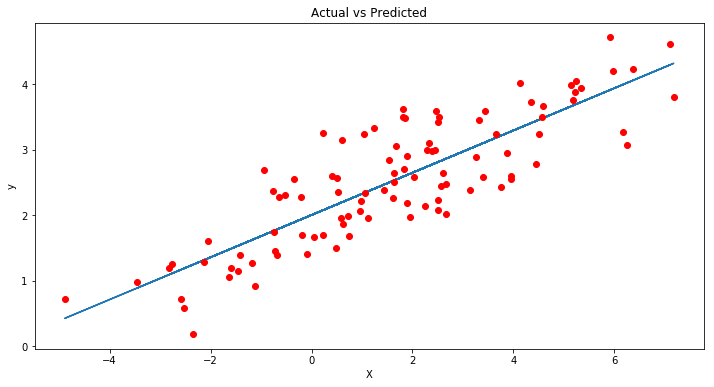

In [3]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()


In [4]:
# Import and display first five rows of advertising dataset
advert = pd.read_csv("./data_ML/Advertising.csv")
advert = advert.drop('Unnamed: 0', axis = 1)

advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


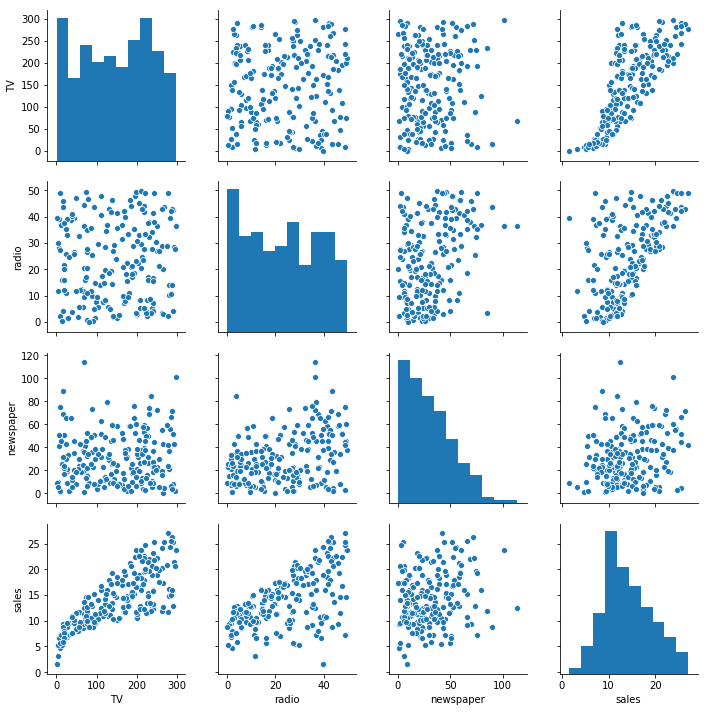

In [5]:
# Seaborn visualization library
import seaborn as sns# Create the default pairplot
sns.pairplot(advert)

/home/andrea/miniconda3/envs/myprop/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


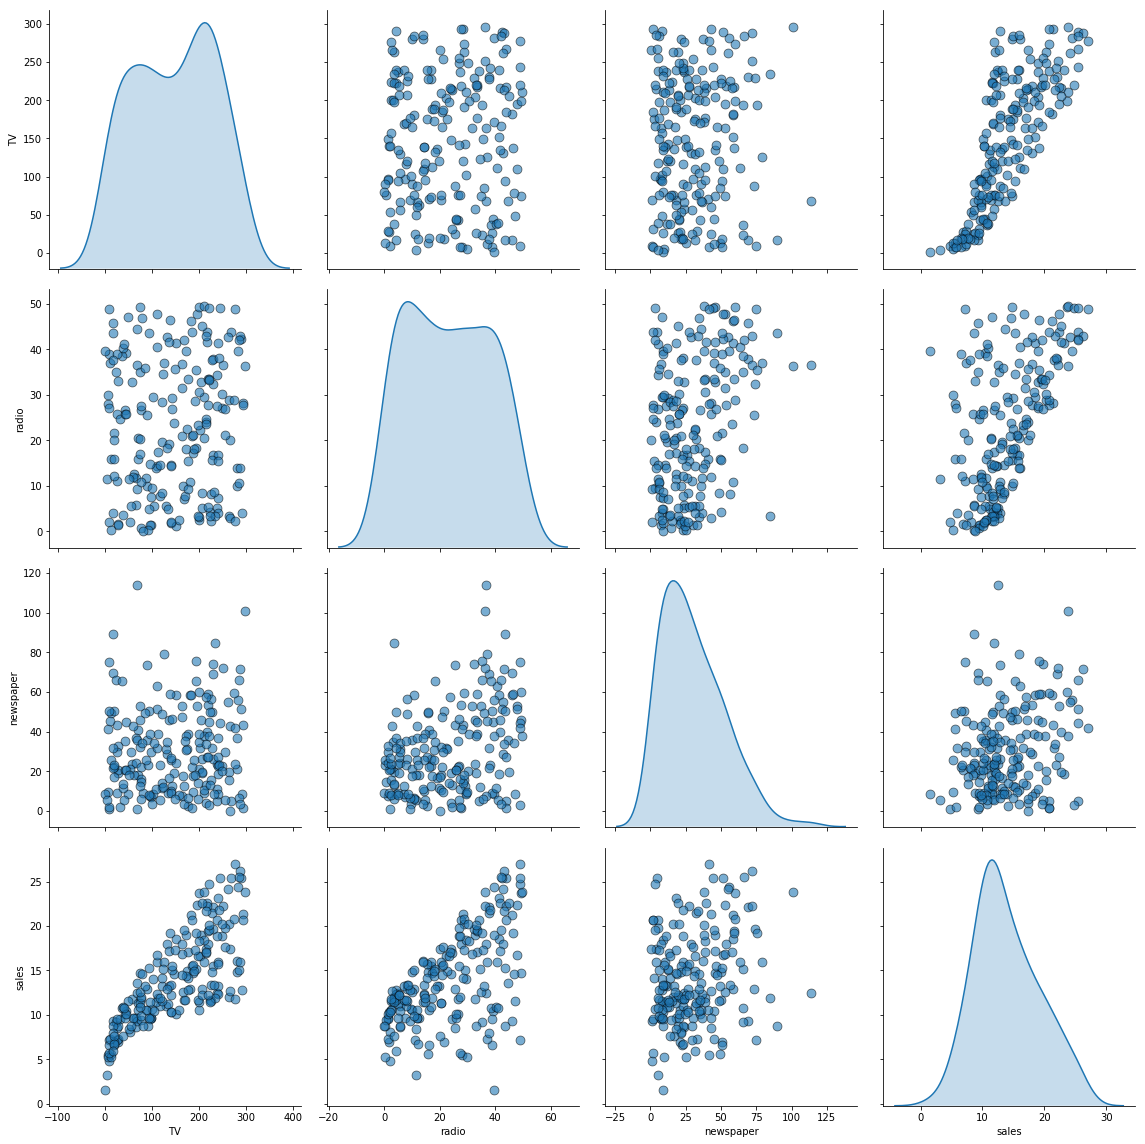

In [6]:
sns.pairplot(advert, hue = None, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

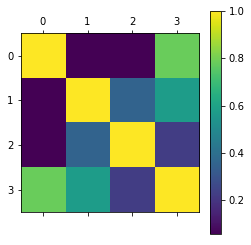

In [7]:
advert.head()
import matplotlib.pyplot as plt

plt.matshow(advert.corr())
plt.colorbar()
plt.show()



In [8]:
#https://scikit-learn.org/stable/modules/linear_model.html




from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(advert.iloc[:,0:3], advert["sales"])
print(advert["sales"])
                                      

reg.coef_


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


array([ 0.04576465,  0.18853002, -0.00103749])

In [9]:
reg = linear_model.BayesianRidge()
reg.fit(advert.iloc[:,0:3], advert["sales"])
print(reg.coef_)

reg2 = linear_model.BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)
reg2.fit(advert.iloc[:,0:3], advert["sales"])
print(reg2.coef_)


[ 0.0457642   0.18741937 -0.00076744]
[ 0.0457642   0.18741937 -0.00076744]
